This is the notebook associated with the article titles [**Democratising Machine learning with H2O**](https://medium.com/p/7f2f79e10e3f/edit)

# What is H2O

The latest version called H2O-3 is the third incarnation of H2O. H2O uses familiar interfaces like R, Python, Scala, Java, JSON and the Flow notebook/web interface, and works seamlessly with big data technologies like Hadoop and Spark. H2O can easily and quickly derive insights from the data through faster and better predictive modelling.
![](https://cdn-images-1.medium.com/max/800/1*269jAbiB6QFXWjhCMzNURw.png)

## Installation

H2O offers an R package that can be installed from CRAN and a python package that can be installed from PyPI.Also you may want to look at the [documentation](http://docs.h2o.ai/h2o/latest-stable/h2o-docs/downloading.html) for complete details.

### Pre-requisites

* Python
* Java 7 or later, which you can get at the [Java download page](https://www.oracle.com/technetwork/java/javase/downloads/index.html).To build H2O or run H2O tests, the 64-bit JDK is required. To run the H2O binary using either the command line, R or Python packages, only 64-bit JRE is required.

### Dependencies 


In [2]:
"""
pip install requests
pip install tabulate
pip install "colorama>=0.3.8"
pip install future

"""

'\npip install requests\npip install tabulate\npip install "colorama>=0.3.8"\npip install future\n\n'

#### Finally Installing on the system with pip

In [5]:

#pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

#### or Conda

In [6]:
# conda install -c h2oai h2o=3.22.1.2

Note: When installing H2O from pip in OS X El Capitan, users must include the --user flag. For example -

```
pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o --user

```


## Testing installation

In [7]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.201-b09, mixed mode)
  Starting server from c:\users\parul\appdata\local\programs\python\python37\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\Parul\AppData\Local\Temp\tmp2rkx4e8d
  JVM stdout: C:\Users\Parul\AppData\Local\Temp\tmp2rkx4e8d\h2o_Parul_started_from_python.out
  JVM stderr: C:\Users\Parul\AppData\Local\Temp\tmp2rkx4e8d\h2o_Parul_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,05 secs
H2O cluster timezone:,Asia/Kolkata
H2O data parsing timezone:,UTC
H2O cluster version:,3.24.0.1
H2O cluster version age:,19 days
H2O cluster name:,H2O_from_python_Parul_6tdu89
H2O cluster total nodes:,1
H2O cluster free memory:,1.757 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"


## Importing Data with H2O in Python


The data belongs to the white variants of the Portuguese "Vinho Verde" wine. 
* Source: https://archive.ics.uci.edu/ml/datasets/Wine+Quality
* CSV FIle : (https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv)

In [9]:
wine_data = h2o.import_file("winequality-white.csv")
wine_data.head(5)# The default head() command displays the first 10 rows.

Parse progress: |█████████████████████████████████████████████████████████| 100%


fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
7,0.27,0.36,20.7,0.045,45,170,1.001,3,0.45,8.8,6
6.3,0.3,0.34,1.6,0.049,14,132,0.994,3.3,0.49,9.5,6
8.1,0.28,0.4,6.9,0.05,30,97,0.9951,3.26,0.44,10.1,6
7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.4,9.9,6
7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.4,9.9,6


## EDA

In [10]:
wine_data.describe()

Rows:4898
Cols:12




,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
type,real,real,real,real,real,real,real,real,real,real,real,int
mins,3.8,0.08,0.0,0.6,0.009,2.0,9.0,0.98711,2.72,0.22,8.0,3.0
mean,6.854787668436097,0.27824111882400976,0.33419150673744386,6.391414863209472,0.04577235606369949,35.30808493262556,138.3606574111883,0.9940273764801961,3.1882666394446715,0.489846876276031,10.514267047774602,5.87790935075541
maxs,14.2,1.1,1.66,65.8,0.346,289.0,440.0,1.03898,3.82,1.08,14.2,9.0
sigma,0.8438682276875128,0.10079454842486532,0.1210198042029825,5.072057784014881,0.021847968093728794,17.007137325232588,42.49806455414292,0.0029909069169369337,0.15100059961506662,0.1141258339488323,1.2306205677573177,0.8856385749678312
zeros,0,0,19,0,0,0,0,0,0,0,0,0
missing,0,0,0,0,0,0,0,0,0,0,0,0
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6.0
1,6.3,0.3,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5,6.0
2,8.1,0.28,0.4,6.9,0.05,30.0,97.0,0.9951,3.26,0.44,10.1,6.0


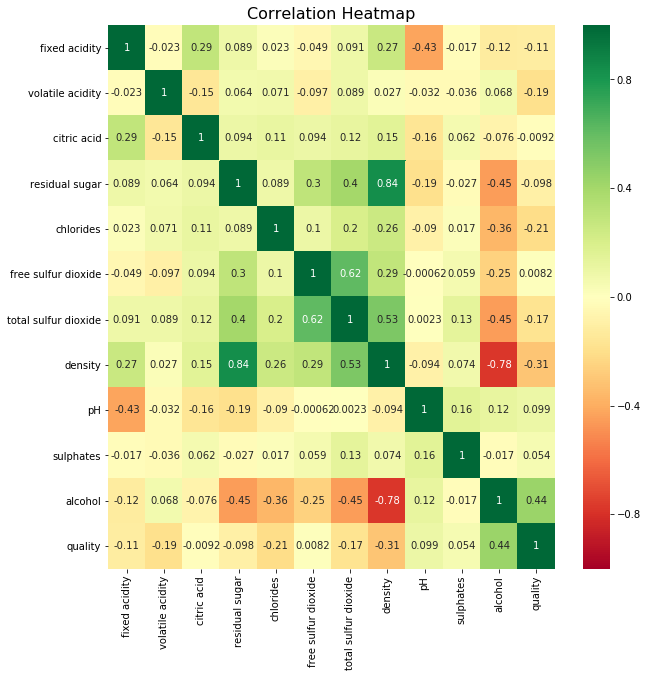

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,10))
corr = wine_data.cor().as_data_frame()
corr.index = wine_data.columns
sns.heatmap(corr, annot = True, cmap='RdYlGn', vmin=-1, vmax=1)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

## Modeling with H2O
Let us now build a regression model to predict the Quality of the wine. There a lot of [Algorithms](http://docs.h2o.ai/h2o/latest-stable/h2o-docs/data-science.html) available in the H2O module both for Classification as well as Regression problems.

### Splitting data into Test and Training sets

In [16]:
wine_split = wine_data.split_frame(ratios = [0.8], seed = 1234)
wine_train = wine_split[0] # using 80% for training
wine_test = wine_split[1] #rest 20% for testing
print(wine_train.shape, wine_test.shape)

(3932, 12) (966, 12)


### Defining Predictor Variables


In [17]:
predictors = list(wine_data.columns) 
predictors.remove('quality')  # Since we need to predict quality
predictors

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

## Generalized Linear Model

We shall build a Generalized Linear Model (GLM) with default settings. Generalized Linear Models (GLM) estimate regression models for outcomes following exponential distributions. In addition to the Gaussian (i.e. normal) distribution, these include Poisson, binomial, and gamma distributions. You can read more about GLM in the [documentation](http://docs.h2o.ai/h2o/latest-stable/h2o-docs/data-science/glm.html).

In [20]:
# Import the function for GLM
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
# Set up GLM for regression
glm = H2OGeneralizedLinearEstimator(family = 'gaussian', model_id = 'glm_default')
# Use .train() to build the model
glm.train(x = predictors, 
                  y = 'quality', 
                  training_frame = wine_train)
print(glm)

glm Model Build progress: |███████████████████████████████████████████████| 100%
Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  glm_default


ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 0.566326060043901
RMSE: 0.7525463839816792
MAE: 0.5855739117180468
RMSLE: 0.11135798916908833
R^2: 0.2851690977880197
Mean Residual Deviance: 0.566326060043901
Null degrees of freedom: 3931
Residual degrees of freedom: 3920
Null deviance: 3115.13402848424
Residual deviance: 2226.7940680926185
AIC: 8948.855269434122
Scoring History: 


,timestamp,duration,iterations,negative_log_likelihood,objective
,2019-04-20 12:25:35,0.000 sec,0,3115.1340285,0.7922518


Now, let's check the model's performance on the test dataset

In [21]:
glm.model_performance(wine_test)


ModelMetricsRegressionGLM: glm
** Reported on test data. **

MSE: 0.5546397919709453
RMSE: 0.7447414262486982
MAE: 0.5795791157106455
RMSLE: 0.1107966197145175
R^2: 0.26184927981796025
Mean Residual Deviance: 0.5546397919709453
Null degrees of freedom: 965
Residual degrees of freedom: 954
Null deviance: 725.8587305402418
Residual deviance: 535.7820390439331
AIC: 2197.993684313266


### Making Predictions

In [23]:
predictions = glm.predict(wine_test)
predictions.head(5)

glm prediction progress: |████████████████████████████████████████████████| 100%


predict
5.76109
5.76721
5.64325
5.85764
5.77967


## H2OAutoML: Automatic Machine Learning

Automated machine learning (AutoML) is the process of automating the end-to-end process of applying machine learning to real-world problems. AutoML makes machine learning available in a true sense, even to people with no major expertise in this field. H2O's AutoML tends to automate the training and the tuning part of the models.
![](https://cdn-images-1.medium.com/max/800/1*st_Rwr7WbikMvS9wTprSWw.png)

### Importing the AutoML Module

In [25]:
from h2o.automl import H2OAutoML
aml = H2OAutoML(max_models = 20, max_runtime_secs=100, seed = 1)

Here AutoML will run for 10 base models for 100 seconds. The default runtime is 1 Hour.

### Training

In [28]:
aml.train(x=predictors, y='quality', training_frame=wine_train, validation_frame=wine_test)

AutoML progress: |████████████████████████████████████████████████████████| 100%


## Leaderboard
Now let us look at the automl leaderboard.

In [30]:
print(aml.leaderboard)

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
StackedEnsemble_AllModels_AutoML_20190420_122903,0.392704,0.626661,0.392704,0.454921,0.0938982
StackedEnsemble_BestOfFamily_AutoML_20190420_122903,0.392844,0.626773,0.392844,0.454849,0.0939121
XRT_1_AutoML_20190420_122903,0.404961,0.636366,0.404961,0.463282,0.0953964
DRF_1_AutoML_20190420_122903,0.413018,0.642664,0.413018,0.466174,0.0963974
GBM_4_AutoML_20190420_122903,0.417493,0.646137,0.417493,0.486555,0.0966819
GBM_3_AutoML_20190420_122903,0.426668,0.653198,0.426668,0.499098,0.097667
GBM_1_AutoML_20190420_122903,0.435121,0.659637,0.435121,0.505029,0.0984655
GBM_2_AutoML_20190420_122903,0.440507,0.663707,0.440507,0.512223,0.0990434
GBM_grid_1_AutoML_20190420_122903_model_1,0.450951,0.671529,0.450951,0.525711,0.100326
GBM_5_AutoML_20190420_122903,0.473033,0.687774,0.473033,0.533694,0.102412


The leaderboard displays the top 10 models built by AutoML with their parameters. The best model is placed on the top is a Stacked Ensemble.
The leader model is stored as ```aml.leader```

In [31]:
aml.leader

Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_AutoML_20190420_122903
No model summary for this model


ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 0.0692588342693806
RMSE: 0.26317073216712494
MAE: 0.1895322891944602
RMSLE: 0.039487473668358815
R^2: 0.9125797690060501
Mean Residual Deviance: 0.0692588342693806
Null degrees of freedom: 3931
Residual degrees of freedom: 3924
Null deviance: 3115.13402848424
Residual deviance: 272.32573634720455
AIC: 678.4678504783503

ModelMetricsRegressionGLM: stackedensemble
** Reported on validation data. **

MSE: 0.3701741695966913
RMSE: 0.6084194027122174
MAE: 0.43325352090210517
RMSLE: 0.09129212114028859
R^2: 0.507348131460968
Mean Residual Deviance: 0.3701741695966913
Null degrees of freedom: 965
Residual degrees of freedom: 958
Null deviance: 725.8587305402418
Residual deviance: 357.5882478304038
AIC: 1799.39616697501

ModelMetricsRegressionGLM: stackedensembl

### Contribution of Individual Models

c:\users\parul\appdata\local\programs\python\python37\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


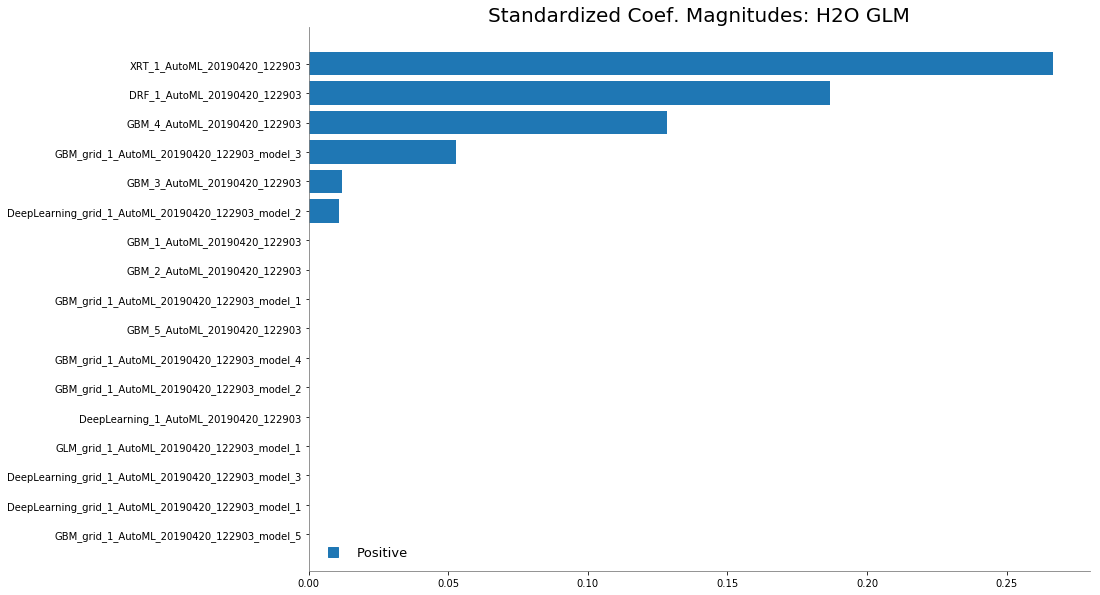

In [33]:
metalearner = h2o.get_model(aml.leader.metalearner()['name'])
metalearner.std_coef_plot()

XRT( Extremely Randomized Trees) has the maximum contribution followed by Distributed Random Forests.

### Predictions

In [34]:

preds = aml.leader.predict(wine_test)

stackedensemble prediction progress: |████████████████████████████████████| 100%


The code above is the quickest way to get started, however, to learn more about H2O AutoML it is worth taking a look at the in-depth [AutoML tutorial](https://github.com/h2oai/h2o-tutorials/tree/master/h2o-world-2017/automl) (available in R and Python).

### Shutting Down

In [35]:
h2o.shutdown()

[WARNING] in <ipython-input-35-1edf85295eae> line 1:
    >>> h2o.shutdown()
        ^^^^ Deprecated, use ``h2o.cluster().shutdown()``.
H2O session _sid_a3dd closed.
